## Assignment 3

Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the
Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger
survived or
not.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pylab import rcParams
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
Url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

In [3]:
titanic = pd.read_csv(Url) # reading Data

In [4]:
titanic.columns =["PassengerId","Survived","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","E mbarked"]

In [5]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
titanic.info() #getting information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  E mbarked    889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic.drop(labels=["PassengerId","Name","Ticket","Cabin","E mbarked"], axis=1,inplace=True) #drop Unneccesary columns

In [8]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [9]:
titanic.isnull().sum()  # calculating Null Values

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [10]:
titanic.dropna(subset=['Age'],inplace=True)   #droping null values in Age columns

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 44.6+ KB


In [12]:
titanic["Sex"] = titanic["Sex"].map({"male":0,"female":1})   # converting categotical into Numerical

In [13]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
889,1,1,0,26.0,0,0,30.0000


In [14]:
X = titanic.drop(labels="Survived",axis = 1)  # seperating independent variables

In [15]:
y = titanic["Survived"]  #sepearting dependant variable

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=.20,random_state=100)   #splitting data for training and testing

In [17]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare
59,3,0,11.0,5,2,46.9000
276,3,1,45.0,0,0,7.7500
850,3,0,4.0,4,2,31.2750
40,3,1,40.0,1,0,9.4750
336,1,0,29.0,1,0,66.6000
...,...,...,...,...,...,...
726,2,1,30.0,3,0,21.0000
70,2,0,32.0,0,0,10.5000
437,2,1,24.0,2,3,18.7500
102,1,0,21.0,0,1,77.2875


In [18]:
Y_train

59     0
276    0
850    0
40     0
336    0
      ..
726    1
70     0
437    1
102    0
659    0
Name: Survived, Length: 571, dtype: int64

## First Check with base Model

In [19]:
Model = DecisionTreeClassifier()   #initializing Base model

In [20]:
Model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [21]:
from sklearn import tree

[Text(578.2163433056872, 1058.5894736842106, 'X[1] <= 0.5\ngini = 0.488\nsamples = 571\nvalue = [330, 241]'),
 Text(211.00614632701422, 1001.3684210526317, 'X[2] <= 6.5\ngini = 0.344\nsamples = 362\nvalue = [282, 80]'),
 Text(21.156398104265403, 944.1473684210526, 'X[3] <= 2.5\ngini = 0.408\nsamples = 21\nvalue = [6, 15]'),
 Text(10.578199052132701, 886.9263157894737, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(31.734597156398102, 886.9263157894737, 'X[5] <= 31.331\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(21.156398104265403, 829.7052631578947, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(42.312796208530806, 829.7052631578947, 'X[2] <= 2.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(31.734597156398102, 772.4842105263158, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(52.89099526066351, 772.4842105263158, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(400.85589454976304, 944.1473684210526, 'X[0] <= 1.5\ngini = 0.309\nsamples = 341\nvalue = [276, 65]'

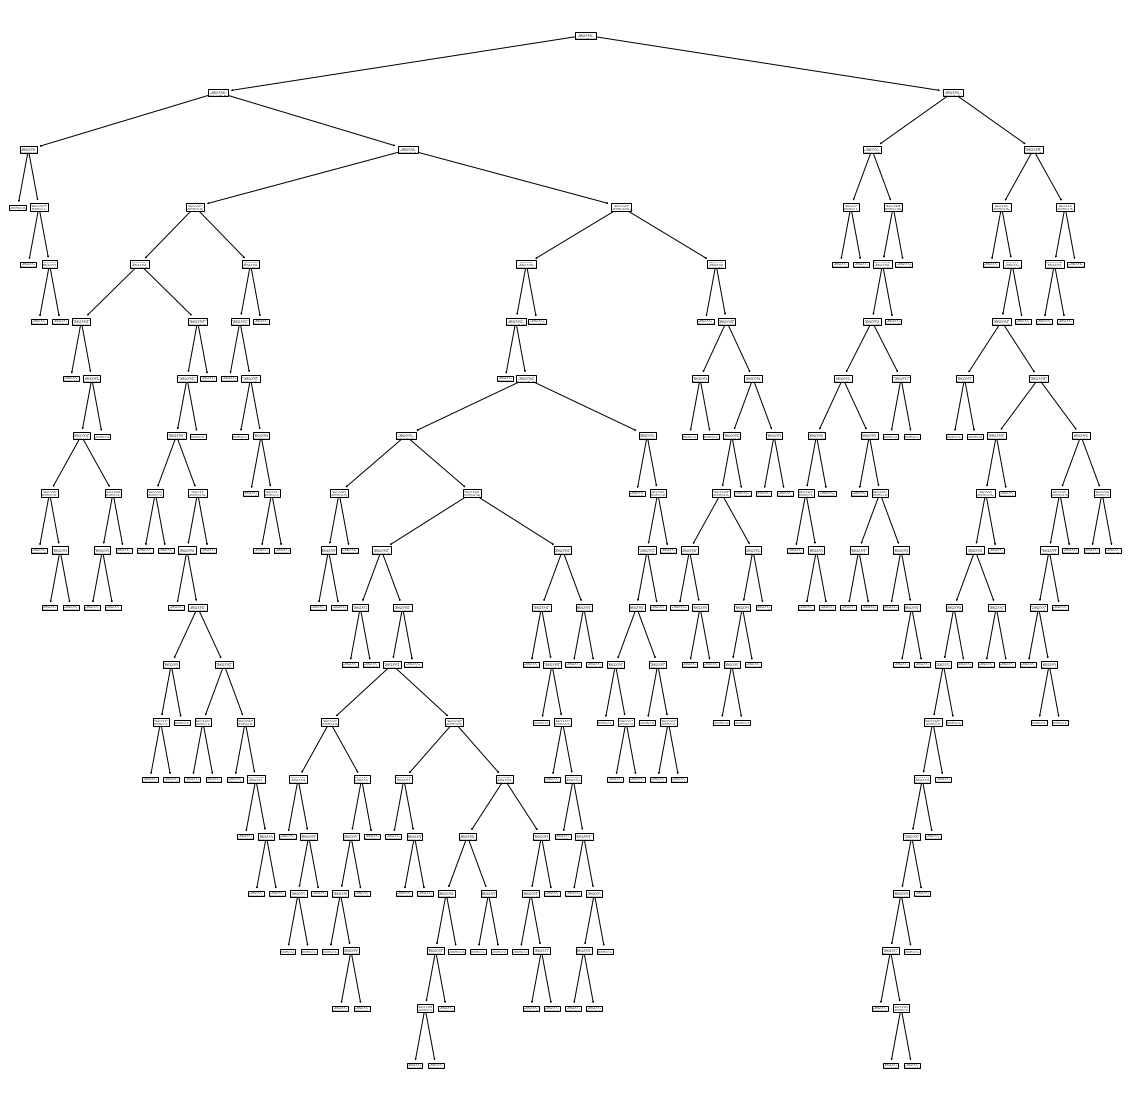

In [22]:
plt.figure(figsize=(20,20))
tree.plot_tree(Model)   # seems like tree is complicated try to reduce the complexity

In [23]:
Model.score(X,y)   #training score

0.9411764705882353

In [24]:
Model.score(X_test,Y_test)  # testing score

0.7692307692307693

## let's Tune our model to get good accuracy of both training and testing data

In [25]:
param_grids = {"criterion":["gini", "entropy"],
              "splitter":["best", "random"],
              "max_depth" : range(2,15,1)   
             }     
#selecting parameter for hyperparameter tuning

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
Grid_param = GridSearchCV(estimator=Model,param_grid=param_grids,cv=10,n_jobs=-1)   # starting tuning our model

In [28]:
Grid_param.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 15),
                         'splitter': ['best', 'random']})

In [29]:
Grid_param.best_params_   # get the best parameter for our model

{'criterion': 'entropy', 'max_depth': 6, 'splitter': 'best'}

In [30]:
Decision_tree_model = DecisionTreeClassifier(criterion='gini',max_depth=6,splitter='random')

In [31]:
Decision_tree_model.fit(X_train,Y_train) # check the accuracy of training data

DecisionTreeClassifier(max_depth=6, splitter='random')

In [32]:
Decision_tree_model.score(X_test,Y_test)    # check the accuracy of testing data

0.7972027972027972

In [33]:
Decision_tree_model.score(X,y)

0.8333333333333334

[Text(167.7671052631579, 201.90857142857143, 'X[1] <= 0.562\ngini = 0.488\nsamples = 571\nvalue = [330, 241]'),
 Text(78.56052631578947, 170.84571428571428, 'X[0] <= 1.317\ngini = 0.344\nsamples = 362\nvalue = [282, 80]'),
 Text(35.242105263157896, 139.78285714285715, 'X[4] <= 1.592\ngini = 0.494\nsamples = 79\nvalue = [44, 35]'),
 Text(17.621052631578948, 108.72, 'X[5] <= 430.171\ngini = 0.49\nsamples = 72\nvalue = [41, 31]'),
 Text(11.747368421052633, 77.65714285714284, 'X[2] <= 20.862\ngini = 0.485\nsamples = 70\nvalue = [41, 29]'),
 Text(5.873684210526316, 46.59428571428572, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(17.621052631578948, 46.59428571428572, 'X[3] <= 1.454\ngini = 0.489\nsamples = 68\nvalue = [39, 29]'),
 Text(11.747368421052633, 15.531428571428563, 'gini = 0.487\nsamples = 67\nvalue = [39, 28]'),
 Text(23.494736842105265, 15.531428571428563, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(23.494736842105265, 77.65714285714284, 'gini = 0.0\nsamples = 2\nvalue

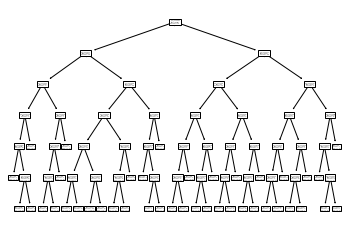

In [34]:
tree.plot_tree(Decision_tree_model)

In [35]:
import pickle
pickle.dump(Decision_tree_model, open('Decision_tree_model.pkl', 'wb'))

In [36]:
import pickle
model = pickle.load(open('Decision_tree_model.pkl', 'rb'))

In [37]:
pred = model.predict(X_test)

In [38]:
classification_report(Y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.86      0.89      0.88        94\n           1       0.78      0.71      0.74        49\n\n    accuracy                           0.83       143\n   macro avg       0.82      0.80      0.81       143\nweighted avg       0.83      0.83      0.83       143\n'

In [78]:
model.predict(np.array([1,1,35.0,1,0,53.1000]).reshape(1,6))  # check random data from original data

array([1], dtype=int64)